
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

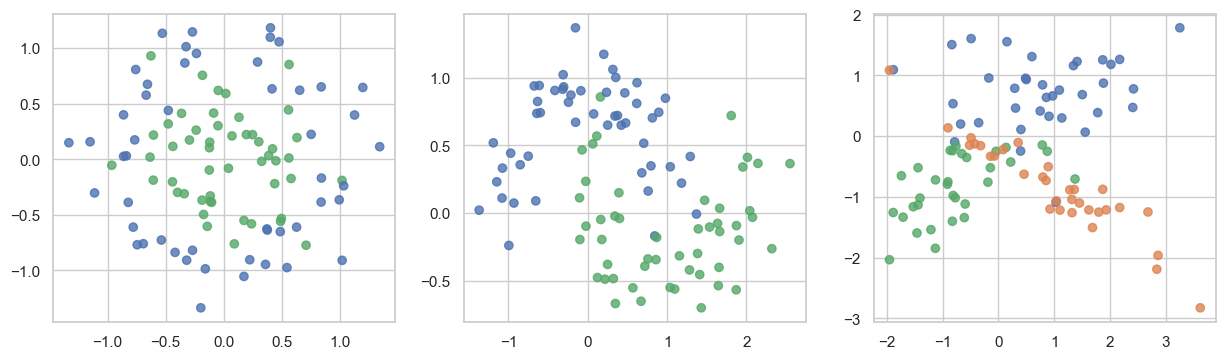

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

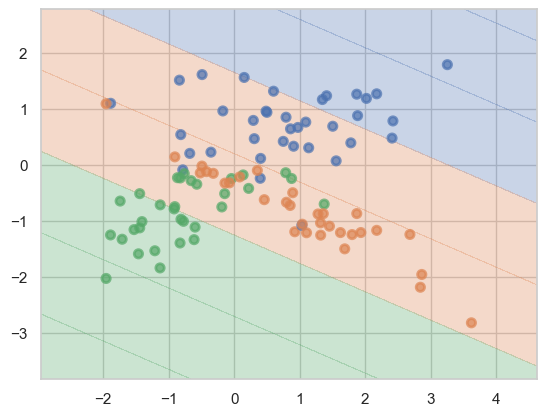

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Train Accuracy: 1.00
  Test Accuracy: 0.73
  Overfitting: 0.27

Dataset 2:
  Train Accuracy: 1.00
  Test Accuracy: 0.87
  Overfitting: 0.13
Dataset 3:
  Train Accuracy: 1.00
  Test Accuracy: 0.83
  Overfitting: 0.17


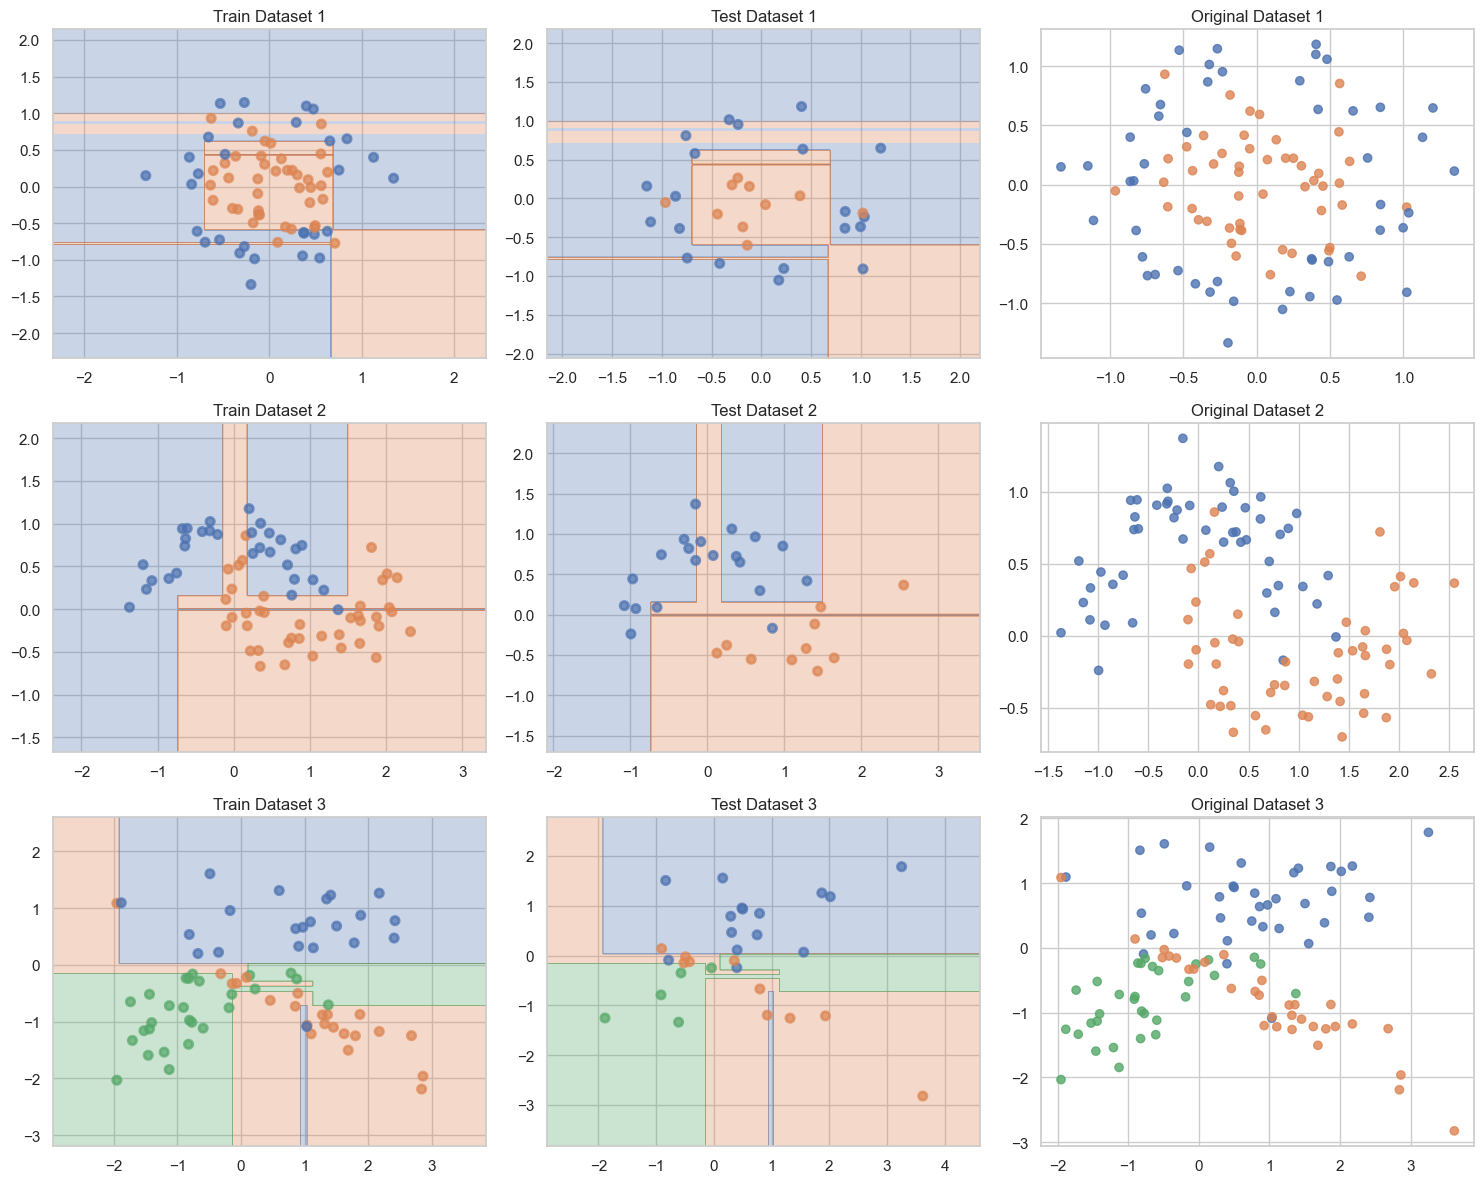

In [7]:
from sklearn.metrics import accuracy_score

RANDOM_STATE = 42

plt.figure(figsize=(15, 12))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Dataset {i + 1}:")
    print(f"  Train Accuracy: {train_accuracy:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}")
    print(f"  Overfitting: {train_accuracy - test_accuracy:.2f}\n")

    plt.subplot(3, 3, i * 3 + 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f"Train Dataset {i + 1}")

    plt.subplot(3, 3, i * 3 + 2)
    plot_surface(clf, X_test, y_test)
    plt.title(f"Test Dataset {i + 1}")

    plt.subplot(3, 3, i * 3 + 3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(sns.color_palette(n_colors=len(np.unique(y)))), alpha=0.8)
    plt.title(f"Original Dataset {i + 1}")

plt.tight_layout()
plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

1. Переобучение: Все три решающих дерева показывают признаки переобучения, так как точность на обучающей выборке равна 1.00, в то время как на тестовой выборке она значительно ниже. Это особенно заметно для первого датасета (make_circles), где разница составляет 0.27.

2. Точность на тестовой выборке: Наибольшая точность на тестовой выборке наблюдается для третьего датасета (make_classification), что может быть связано с его структурой и разделимостью классов.

4. Графики разделяющих поверхностей для обучающих и тестовых выборок, а также исходных датасетов, подтверждают, что модели слишком подогнаны под обучающие данные, что приводит к снижению точности на новых данных. 




__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
def plot_surface(clf, X, y, ax, title=""):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )
    ax.set_title(title)

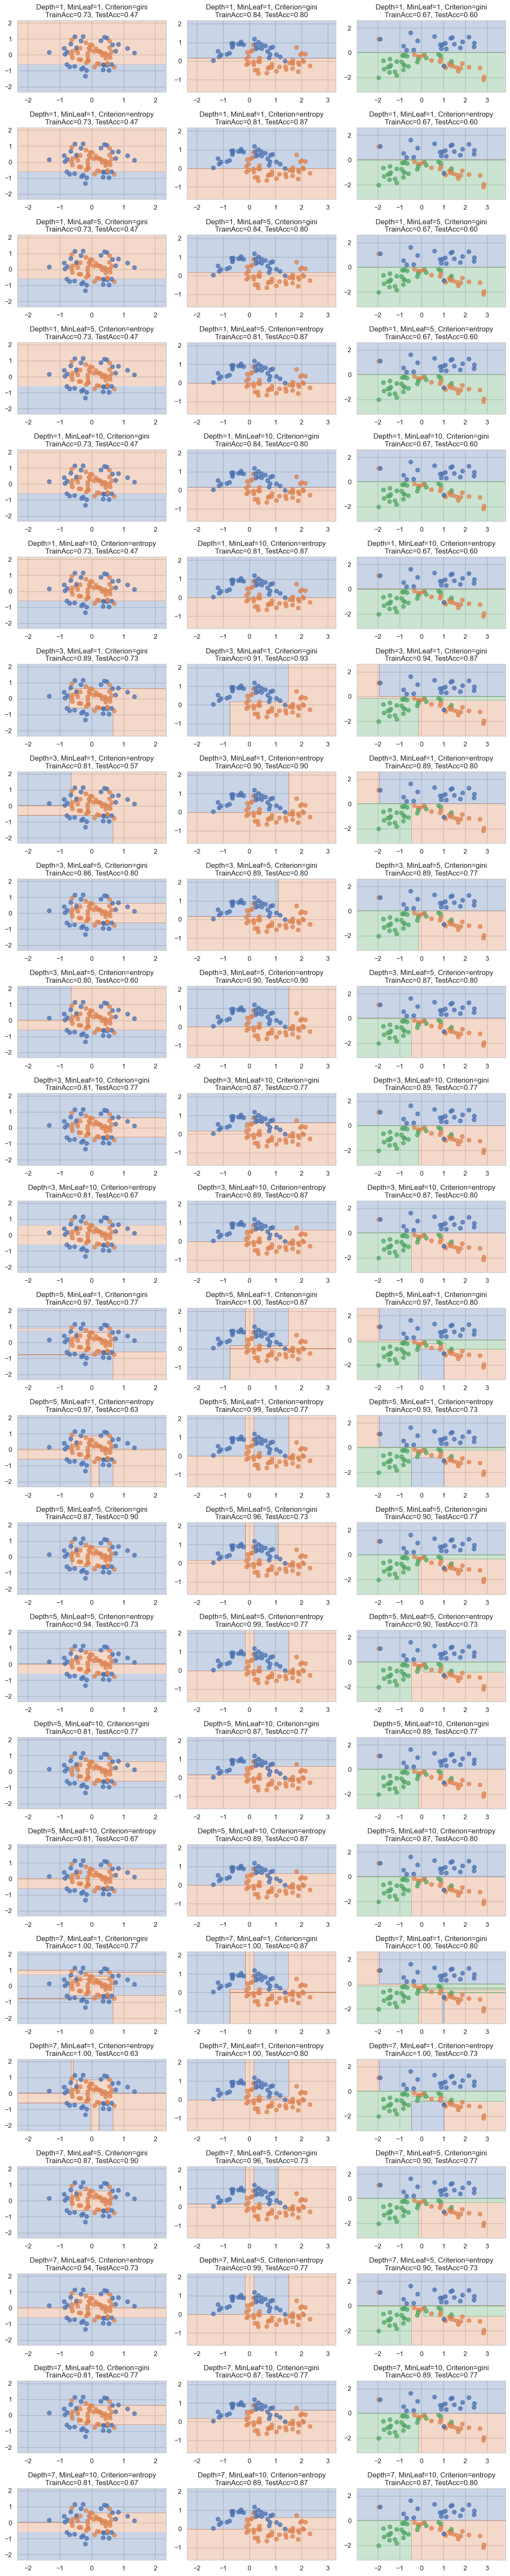

In [9]:
param_grid = {
    "max_depth": [1, 3, 5, 7],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}

split_data = [train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE) for X, y in datasets]

fig, axes = plt.subplots(len(param_grid["max_depth"]) * len(param_grid["min_samples_leaf"]) * len(
    param_grid["criterion"]), len(datasets), figsize=(12, 60))

for i, (X_train, X_test, y_train, y_test) in enumerate(split_data):
    for j, max_depth in enumerate(param_grid["max_depth"]):
        for k, min_samples_leaf in enumerate(param_grid["min_samples_leaf"]):
            for l, criterion in enumerate(param_grid["criterion"]):
                clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                             criterion=criterion)
                clf.fit(X_train, y_train)

                y_train_pred = clf.predict(X_train)
                y_test_pred = clf.predict(X_test)

                train_accuracy = accuracy_score(y_train, y_train_pred)
                test_accuracy = accuracy_score(y_test, y_test_pred)
                
                ax = axes[j * len(param_grid["min_samples_leaf"]) * len(param_grid["criterion"]) + k * len(
                    param_grid["criterion"]) + l, i]
                plot_surface(clf, X_train, y_train, ax,
                             f"Depth={max_depth}, MinLeaf={min_samples_leaf}, Criterion={criterion}\nTrainAcc={train_accuracy:.2f}, TestAcc={test_accuracy:.2f}")

plt.tight_layout()
plt.show()

__Ответ:__ 

#### 1. **Dataset 1 (make_circles)**
- **Общая картина:**
  - При `max_depth=1`, модель слишком проста и явно недообучена, что видно по низким точностям на обучающей и тестовой выборках.
  - С увеличением `max_depth` до 3, 5 и 7, модель начинает лучше подгоняться под данные, точность на обучающей выборке растет, но точность на тестовой выборке не всегда улучшается.
  - Включение регуляризации через параметр `min_samples_leaf` помогает уменьшить переобучение.

- **Регуляризация:**
  - С увеличением `min_samples_leaf`, разделяющая поверхность становится более гладкой и менее подверженной переобучению. Это особенно заметно при больших значениях `max_depth`.
  - Использование критерия `entropy` иногда улучшает точность на тестовой выборке по сравнению с `gini`.

#### 2. **Dataset 2 (make_moons)**
- **Общая картина:**
  - При `max_depth=1`, модель также слишком проста и недообучена, что видно по низким точностям.
  - С увеличением `max_depth`, модель становится более точной на обучающей выборке, но переобучение становится проблемой при отсутствии регуляризации.
  - Разделяющие поверхности при больших значениях `max_depth` становятся сложными и более точно подгоняются под обучающую выборку.

- **Регуляризация:**
  - Введение регуляризации через `min_samples_leaf` снова помогает сгладить разделяющие поверхности и улучшить обобщающую способность модели.
  - Критерий `entropy` в некоторых случаях помогает лучше обобщить на тестовой выборке.

#### 3. **Dataset 3 (make_classification)**
- **Общая картина:**
  - При `max_depth=1`, модель недообучена.
  - С увеличением `max_depth` точность на обучающей выборке растет, но на тестовой выборке она не всегда улучшается пропорционально.

- **Регуляризация:**
  - `min_samples_leaf` помогает избежать переобучения, разделяющие поверхности становятся менее сложными.
  - Критерий `entropy` иногда дает лучшую точность на тестовой выборке по сравнению с `gini`.

### Общие выводы:
- **Обобщающая способность и переобучение:**
  - Во всех датасетах с увеличением `max_depth` и без регуляризации модели имеют тенденцию к переобучению.
  - Регуляризация через `min_samples_leaf` сглаживает разделяющие поверхности и улучшает обобщающую способность моделей.
  - Различие между `gini` и `entropy` обычно незначительно, но в некоторых случаях `entropy` дает небольшое улучшение.

- **Поведение для разных датасетов:**
  - Различные датасеты демонстрируют схожие тенденции в плане переобучения и обобщающей способности при изменении гиперпараметров.
  - Однако структура данных (например, количество классов, расположение кластеров) влияет на эффективность конкретных комбинаций гиперпараметров.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [10]:
data = pd.read_csv('students.csv')

feature_columns = data.columns[:-1]
target_column = data.columns[-1]

features = data[feature_columns].values
target = data[target_column].values

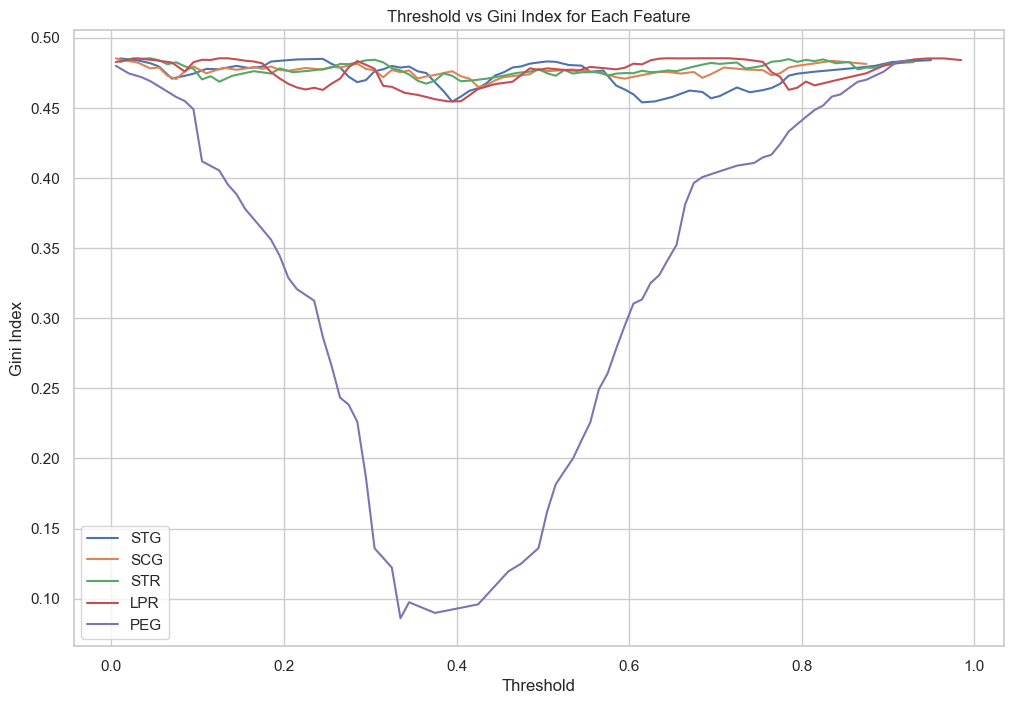

In [11]:
from tree_code import find_best_split

plt.figure(figsize=(12, 8))

for i, feature_name in enumerate(feature_columns):
    feature_vector = features[:, i]
    thresholds, ginis, _, _ = find_best_split(feature_vector, target)
    plt.plot(thresholds, ginis, label=feature_name)

plt.xlabel('Threshold')
plt.ylabel('Gini Index')
plt.title('Threshold vs Gini Index for Each Feature')
plt.legend()
plt.grid(True)
plt.show()

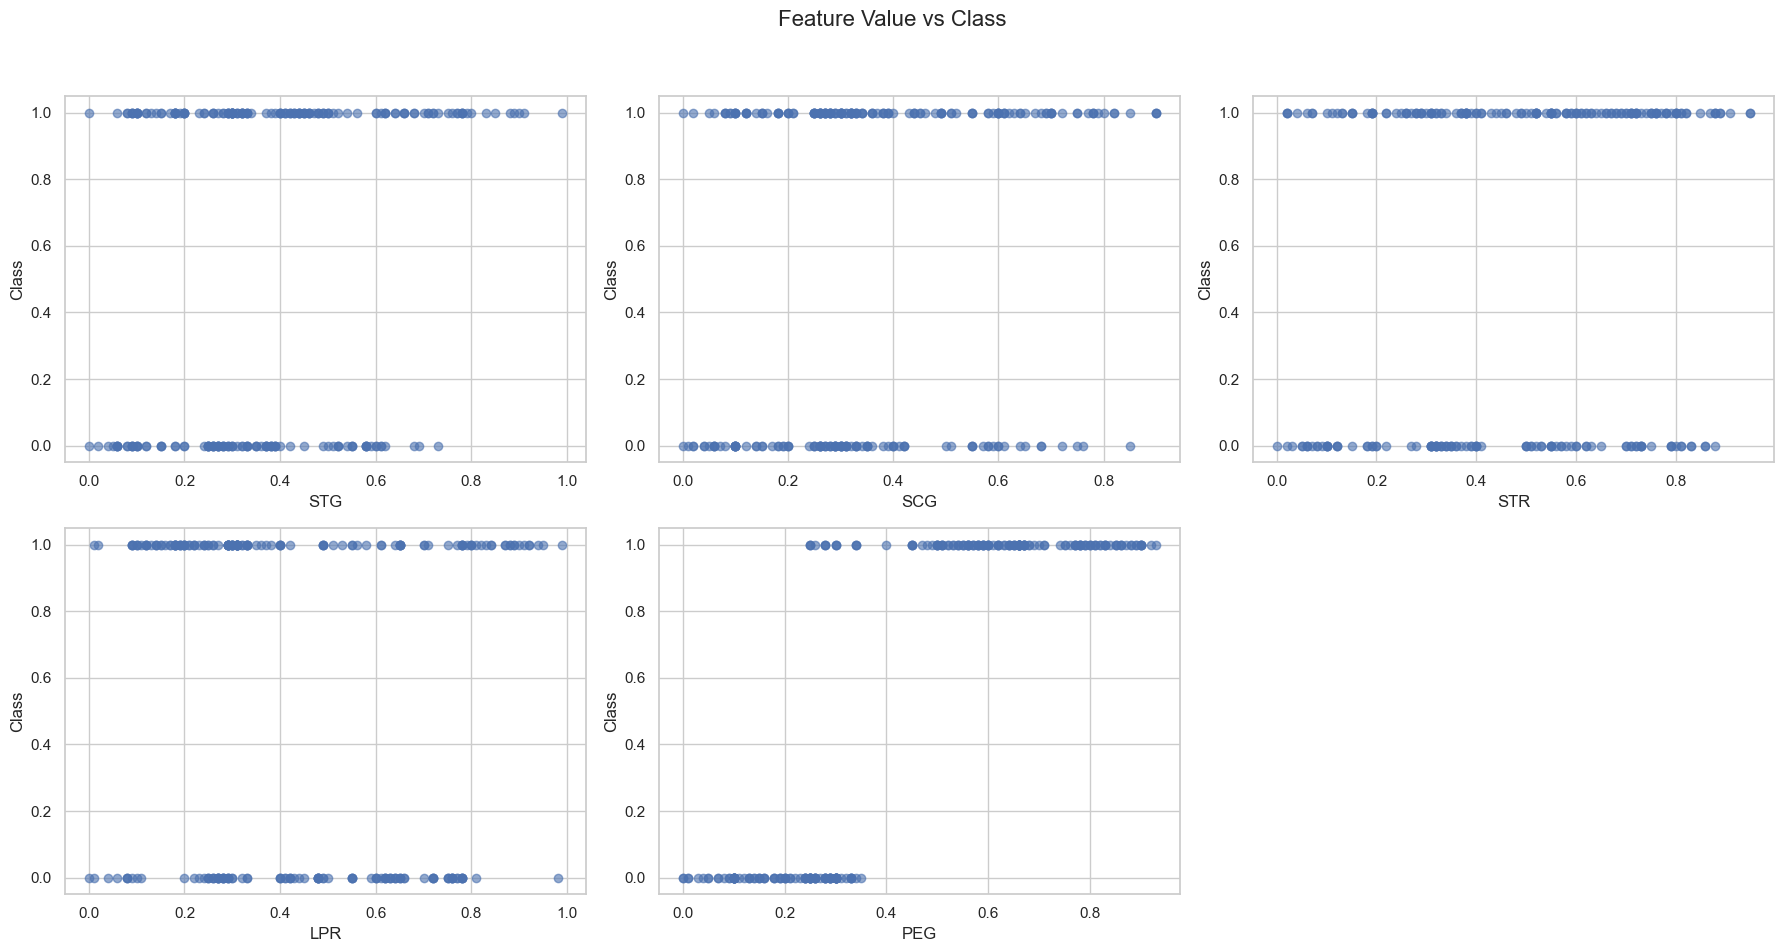

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Value vs Class', fontsize=16)

for i, feature_name in enumerate(feature_columns):
    ax = axs[i // 3, i % 3]
    ax.scatter(features[:, i], target, alpha=0.6)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Class')
    ax.grid(True)

fig.delaxes(axs[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ


#### 1. Выбор признака для разбиения
На основании кривых критерия Джини и визуальной оценки scatter-графиков, наиболее подходящим признаком для разбиения выборки на два поддерева является **PEG**.

#### Поддержка выбора:
- **Кривая критерия Джини**: Кривая для признака PEG показывает выраженный минимум в районе значений около 0.3. Это указывает на наличие хорошего порога, при котором разделение данных приводит к минимальному значению критерия Джини.
- **Scatter-график**: На scatter-графике для признака PEG видно явное разделение между классами 0 и 1, особенно при значениях около 0.3, что подтверждает возможность хорошего разбиения данных по этому признаку.

#### 2. Визуальные характеристики "хороших" и "плохих" признаков для разбиения

- **"Хорошие" признаки**:
  - **Кривая Джини**: Имеет выраженный минимум, который указывает на наличие порога, при котором выборка делится почти идеально. Кривая быстро падает к минимуму и затем поднимается, формируя четко выраженную "V"-образную или "U"-образную форму.
  - **Scatter-график**: Показывает четкое разделение классов по значениям признака, часто с небольшим перекрытием между классами в определенной области значений.

- **"Плохие" признаки**:
  - **Кривая Джини**: Имеет плоскую или незначительно изменяющуюся форму без явных минимумов. Это указывает на то, что нет порогов, при которых можно существенно уменьшить неоднородность поддеревьев.
  - **Scatter-график**: Классы сильно перемешаны, нет явного разделения между классами по значениям признака, что делает разбиение по этому признаку неэффективным.

### Заключение

Для разбиения выборки наиболее подходящим является признак PEG, что подтверждается как кривой критерия Джини, так и визуальной оценкой scatter-графика. "Хорошие" признаки для разбиения характеризуются четко выраженными минимумами на кривых Джини и явным разделением классов на scatter-графиках, в то время как "плохие" признаки не имеют таких явных характеристик.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




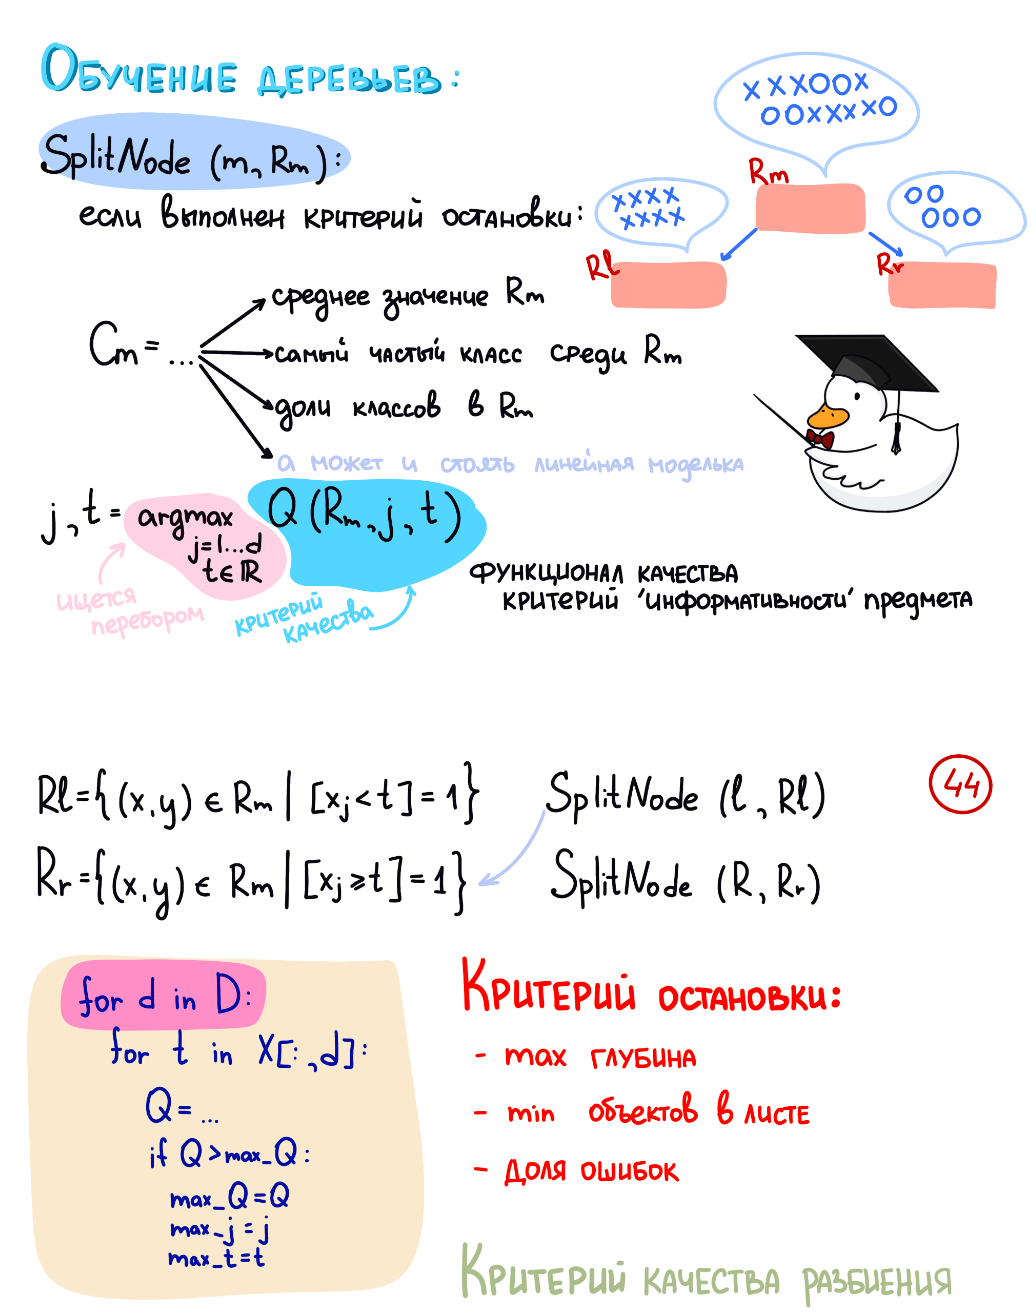

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть `agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data_path = 'agaricus-lepiota.data'
column_names = [
    "target", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

data = pd.read_csv(data_path, header=None, names=column_names)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.drop(columns="target").values
y = data["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


In [15]:
from tree_code import DecisionTree

feature_types = ["categorical"] * X_train.shape[1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [16]:
depth = tree.get_depth()
print("Depth of the tree:", depth)

Depth of the tree: 8


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ